## Logic Based FizzBuzz Function [Software 1.0]

In [1]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    # -> the program is emulating a fun children game. A group of children counts the numbers (for example 1 to 100),
    # but the trick is you cannot pronounce the number which is divisible by 3 or 5. Instead you have to say fizz or
    # or buzz respectively. If it is divisable by both 3 and 5, you must utter fizzbuzz.
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [2]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    # We have a number of data entries which must be fed to machine for training the model so that it can predict
    # unseen data as correctly as possible. To hold muliple data entries we are using list.
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    # Just like human, machine must be fed enough data to formulate an understanding. In case of human child, only
    # after seeing a fruit multiple times, they can recognize the fruit. Same is true for a machine, a model must be
    # supplied multiple data points(i.e. pictures of fruit) to draw conclusion. This is what we call training.
    
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    # Pandas Dataframe is a n-dimentional datastructure, an in-memory data storage tool. 
    # This allows user to do rapid calculations over large amounts of data very quickly.
    # Below example demonstrated an important feature in pandas, that all the data columns are labeled. So we do not
    # need to access them by index. This is important, when the data set and dimention is large.
    
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [3]:
def processData(dataset):
    
    # Why do we have to process?
    # -> the model.fit function is expecting data tensors as argument, so we need to process it to make it comapatible.
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [4]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        
        # Why do we have number 10?
        # -> we are changing the number in 10 bit binary number as highest given decimal number could be
        # 1000 which needs 10 digits to represent in binary.
        processedData.append([dataInstance >> d & 1 for d in range(10)])
        
    
    return np.array(processedData)

In [5]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

Using TensorFlow backend.


## Model Definition

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 10
drop_out = 0.2
first_dense_layer_nodes  = 512
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    # -> In abstruct sense, a model tries to imitate human nervous system. It tries to emulate the way human
    # understand it's surrounding. It takes information given to it, processes it, tries to add layers of
    # understanding with time and come up with more accurate prediction system.
    
    # Why use Dense layer and then activation?
    # -> A dense layer is just a regular layer of neurons in a neural network. 
    # Each neuron recieves input from all the neurons in the previous layer, thus densely connected.
    # -> Activation is used to add non-linearity in the neural network. If we do not add activation after every
    # dense layer, then multiple dense layers practically becomes one single layer of complex linear function.
    
    # Why use sequential model with layers?
    # -> The sequential API allows users to create models layer-by-layer for most problems. It is limited in that,
    # it does not allow us create models that share layers or have multiple inputs or outputs. In this model, one
    # layer uses the previous layer's output as input and it's output feeds next layer only. This is great model for
    # comparatively less complex problems.
    
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
  
    model.add(Dropout(drop_out))
    
    model.add(Dense(256))
    model.add(Activation('relu'))
   
    
    # Why dropout?
    # -> Dropout is a regularization technique, which aims to reduce the complexity of the model with the goal to 
    # prevent overfitting. The key idea is to randomly drop units (along with their connections) from the neural 
    # network during training. This prevents units from co-adapting too much. Another side effect is that 
    # training will be faster.

        
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    # -> Softmax activation is basically the normalized exponential probability of class observations 
    # represented as neuron activations. The softmax function is often used in the final layer of a neural 
    # network-based classifier. It is uded because of the ease of differentiation and being in the range 0-1. 
    # The output of the function is also between 0 and 1 and therefore naturally a suitable choice for 
    # representing probability
    
    model.summary()
    
    # Why use categorical_crossentropy?
    # -> Since the problem we are solving is a multi-classification problem (i.e. 4 expected output classes) we have
    # to use categorical_crossentropy as the loss function. 
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [7]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [8]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               5632      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1028      
__________

# <font color = blue>Run Model</font>

In [9]:
# Validation split is the data, that will be used for validation of the model. If we set validation_data_split = 0.1,
# it means first 90% data will be used for training and last 10% data will be used for validation.

validation_data_split = 0.2

# Epoch is the time duration needed for an entire dataset to be passed forward and backward 
# through the neural network once.

num_epochs = 10000  

# we should not pass the whole dataset in the neural network at the same time. 
#Rather we should feed it batch by batch.
model_batch_size = 128

tb_batch_size = 32

# early_patience parameter will be used in EarlyStopping function. If set the value as 100, that means, system will
# check if the monitored value has stopped imroving over last 100 epochs. If no improvemnet followed, it will stop
# the training.
early_patience = 100


# TensorBoard is a visualization tool. This callback writes a log for TensorBoard, which allows the user to 
# visualize dynamic graphs of the training and test metrics, as well as activation histograms for the 
# different layers in the model.

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)

# In EarlyStopping callback a monitored quantiry is specified. If it stops improving after certain time, 
# this callback stops the training.
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)

# model fit trains the data according to the parameters given to it.
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/10000
720/720 [==============================] - 1s 1ms/step - loss: 1.2566 - acc: 0.4639 - val_loss: 1.1816 - val_acc: 0.5333
Epoch 2/10000
720/720 [==============================] - 1s 821us/step - loss: 1.1680 - acc: 0.5333 - val_loss: 1.1599 - val_acc: 0.5333
Epoch 3/10000
720/720 [==============================] - 0s 689us/step - loss: 1.1537 - acc: 0.5306 - val_loss: 1.1527 - val_acc: 0.5333
Epoch 4/10000
720/720 [==============================] - 0s 686us/step - loss: 1.1480 - acc: 0.5333 - val_loss: 1.1493 - val_acc: 0.5333
Epoch 5/10000
720/720 [==============================] - 1s 695us/step - loss: 1.1400 - acc: 0.5333 - val_loss: 1.1496 - val_acc: 0.5333
Epoch 6/10000
720/720 [==============================] - 1s 705us/step - loss: 1.1324 - acc: 0.5333 - val_loss: 1.1465 - val_acc: 0.5333
Epoch 7/10000
720/720 [==============================] - 0s 694us/step - loss: 1.1379 - acc: 0.5333 - val_loss: 1.1431 - val_acc: 0.53

720/720 [==============================] - 1s 1ms/step - loss: 0.3590 - acc: 0.8972 - val_loss: 0.5793 - val_acc: 0.8333
Epoch 61/10000
720/720 [==============================] - 1s 951us/step - loss: 0.3694 - acc: 0.9028 - val_loss: 0.5671 - val_acc: 0.8333
Epoch 62/10000
720/720 [==============================] - 1s 769us/step - loss: 0.3306 - acc: 0.9042 - val_loss: 0.5446 - val_acc: 0.8611
Epoch 63/10000
720/720 [==============================] - 1s 1ms/step - loss: 0.3187 - acc: 0.9222 - val_loss: 0.5366 - val_acc: 0.8500
Epoch 64/10000
720/720 [==============================] - 1s 940us/step - loss: 0.2820 - acc: 0.9278 - val_loss: 0.5111 - val_acc: 0.8556
Epoch 65/10000
720/720 [==============================] - 1s 859us/step - loss: 0.3009 - acc: 0.9069 - val_loss: 0.5189 - val_acc: 0.8500
Epoch 66/10000
720/720 [==============================] - 1s 961us/step - loss: 0.3001 - acc: 0.9111 - val_loss: 0.5178 - val_acc: 0.8444
Epoch 67/10000
720/720 [=============================

720/720 [==============================] - 1s 725us/step - loss: 0.0839 - acc: 0.9847 - val_loss: 0.2372 - val_acc: 0.9389
Epoch 120/10000
720/720 [==============================] - 1s 738us/step - loss: 0.1072 - acc: 0.9667 - val_loss: 0.2622 - val_acc: 0.9056
Epoch 121/10000
720/720 [==============================] - 0s 673us/step - loss: 0.1015 - acc: 0.9667 - val_loss: 0.2774 - val_acc: 0.9000
Epoch 122/10000
720/720 [==============================] - 1s 771us/step - loss: 0.0971 - acc: 0.9681 - val_loss: 0.2425 - val_acc: 0.9333
Epoch 123/10000
720/720 [==============================] - 1s 700us/step - loss: 0.0869 - acc: 0.9806 - val_loss: 0.2909 - val_acc: 0.8944
Epoch 124/10000
720/720 [==============================] - 0s 668us/step - loss: 0.0902 - acc: 0.9778 - val_loss: 0.2461 - val_acc: 0.9333
Epoch 125/10000
720/720 [==============================] - 1s 747us/step - loss: 0.0971 - acc: 0.9778 - val_loss: 0.2921 - val_acc: 0.8889
Epoch 126/10000
720/720 [==================

720/720 [==============================] - 0s 686us/step - loss: 0.0577 - acc: 0.9778 - val_loss: 0.2546 - val_acc: 0.8889
Epoch 179/10000
720/720 [==============================] - 0s 656us/step - loss: 0.0505 - acc: 0.9833 - val_loss: 0.2174 - val_acc: 0.9222
Epoch 180/10000
720/720 [==============================] - 0s 667us/step - loss: 0.0514 - acc: 0.9861 - val_loss: 0.2413 - val_acc: 0.9111
Epoch 181/10000
720/720 [==============================] - 0s 658us/step - loss: 0.0435 - acc: 0.9917 - val_loss: 0.1896 - val_acc: 0.9500
Epoch 182/10000
720/720 [==============================] - 0s 655us/step - loss: 0.0386 - acc: 0.9931 - val_loss: 0.2049 - val_acc: 0.9167
Epoch 183/10000
720/720 [==============================] - 0s 656us/step - loss: 0.0403 - acc: 0.9861 - val_loss: 0.1966 - val_acc: 0.9389
Epoch 184/10000
720/720 [==============================] - 0s 659us/step - loss: 0.0304 - acc: 0.9944 - val_loss: 0.1957 - val_acc: 0.9389
Epoch 185/10000
720/720 [==================

720/720 [==============================] - 1s 806us/step - loss: 0.0340 - acc: 0.9917 - val_loss: 0.2413 - val_acc: 0.9111
Epoch 238/10000
720/720 [==============================] - 1s 751us/step - loss: 0.0286 - acc: 0.9944 - val_loss: 0.2185 - val_acc: 0.9222
Epoch 239/10000
720/720 [==============================] - 1s 875us/step - loss: 0.0300 - acc: 0.9917 - val_loss: 0.1985 - val_acc: 0.9389
Epoch 240/10000
720/720 [==============================] - 1s 788us/step - loss: 0.0231 - acc: 0.9958 - val_loss: 0.2724 - val_acc: 0.9056
Epoch 241/10000
720/720 [==============================] - 1s 955us/step - loss: 0.0269 - acc: 0.9944 - val_loss: 0.1898 - val_acc: 0.9333
Epoch 242/10000
720/720 [==============================] - 1s 905us/step - loss: 0.0282 - acc: 0.9903 - val_loss: 0.2310 - val_acc: 0.9167
Epoch 243/10000
720/720 [==============================] - 1s 707us/step - loss: 0.0272 - acc: 0.9958 - val_loss: 0.2008 - val_acc: 0.9222
Epoch 244/10000
720/720 [==================

720/720 [==============================] - 1s 768us/step - loss: 0.0202 - acc: 0.9944 - val_loss: 0.2334 - val_acc: 0.9000
Epoch 297/10000
720/720 [==============================] - 0s 682us/step - loss: 0.0218 - acc: 0.9944 - val_loss: 0.2584 - val_acc: 0.9111
Epoch 298/10000
720/720 [==============================] - 1s 735us/step - loss: 0.0259 - acc: 0.9931 - val_loss: 0.2339 - val_acc: 0.9222
Epoch 299/10000
720/720 [==============================] - 1s 747us/step - loss: 0.0131 - acc: 0.9972 - val_loss: 0.2560 - val_acc: 0.9167
Epoch 300/10000
720/720 [==============================] - 0s 685us/step - loss: 0.0161 - acc: 1.0000 - val_loss: 0.1763 - val_acc: 0.9333
Epoch 301/10000
720/720 [==============================] - 1s 727us/step - loss: 0.0217 - acc: 0.9931 - val_loss: 0.2032 - val_acc: 0.9278
Epoch 302/10000
720/720 [==============================] - 1s 726us/step - loss: 0.0215 - acc: 0.9944 - val_loss: 0.2139 - val_acc: 0.9222
Epoch 303/10000
720/720 [==================

720/720 [==============================] - 1s 713us/step - loss: 0.0166 - acc: 0.9972 - val_loss: 0.2032 - val_acc: 0.9167
Epoch 356/10000
720/720 [==============================] - 1s 719us/step - loss: 0.0129 - acc: 0.9972 - val_loss: 0.1876 - val_acc: 0.9278
Epoch 357/10000
720/720 [==============================] - 1s 730us/step - loss: 0.0110 - acc: 1.0000 - val_loss: 0.1837 - val_acc: 0.9333
Epoch 358/10000
720/720 [==============================] - 1s 735us/step - loss: 0.0143 - acc: 0.9958 - val_loss: 0.2203 - val_acc: 0.9167
Epoch 359/10000
720/720 [==============================] - 1s 737us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.2130 - val_acc: 0.9222
Epoch 360/10000
720/720 [==============================] - 1s 875us/step - loss: 0.0161 - acc: 0.9972 - val_loss: 0.1707 - val_acc: 0.9333
Epoch 361/10000
720/720 [==============================] - 1s 710us/step - loss: 0.0120 - acc: 0.9972 - val_loss: 0.2217 - val_acc: 0.9278
Epoch 362/10000
720/720 [==================

720/720 [==============================] - 1s 711us/step - loss: 0.0170 - acc: 0.9944 - val_loss: 0.2505 - val_acc: 0.9222
Epoch 415/10000
720/720 [==============================] - 1s 702us/step - loss: 0.0085 - acc: 0.9986 - val_loss: 0.2596 - val_acc: 0.9222
Epoch 416/10000
720/720 [==============================] - 1s 700us/step - loss: 0.0078 - acc: 1.0000 - val_loss: 0.1760 - val_acc: 0.9444
Epoch 417/10000
720/720 [==============================] - 1s 700us/step - loss: 0.0149 - acc: 0.9944 - val_loss: 0.1719 - val_acc: 0.9444
Epoch 418/10000
720/720 [==============================] - 1s 699us/step - loss: 0.0237 - acc: 0.9903 - val_loss: 0.1877 - val_acc: 0.9333
Epoch 419/10000
720/720 [==============================] - 1s 703us/step - loss: 0.0130 - acc: 0.9972 - val_loss: 0.2280 - val_acc: 0.9111
Epoch 420/10000
720/720 [==============================] - 1s 700us/step - loss: 0.0107 - acc: 0.9986 - val_loss: 0.2840 - val_acc: 0.9111
Epoch 421/10000
720/720 [==================

720/720 [==============================] - 1s 738us/step - loss: 0.0202 - acc: 0.9931 - val_loss: 0.1768 - val_acc: 0.9444
Epoch 474/10000
720/720 [==============================] - 1s 766us/step - loss: 0.0076 - acc: 0.9986 - val_loss: 0.1797 - val_acc: 0.9500
Epoch 475/10000
720/720 [==============================] - 1s 703us/step - loss: 0.0106 - acc: 0.9972 - val_loss: 0.2002 - val_acc: 0.9333
Epoch 476/10000
720/720 [==============================] - 1s 700us/step - loss: 0.0145 - acc: 0.9972 - val_loss: 0.2716 - val_acc: 0.9167
Epoch 477/10000
720/720 [==============================] - 1s 699us/step - loss: 0.0180 - acc: 0.9972 - val_loss: 0.2444 - val_acc: 0.9222
Epoch 478/10000
720/720 [==============================] - 1s 701us/step - loss: 0.0136 - acc: 0.9958 - val_loss: 0.1903 - val_acc: 0.9389
Epoch 479/10000
720/720 [==============================] - 1s 766us/step - loss: 0.0070 - acc: 0.9986 - val_loss: 0.2377 - val_acc: 0.9333
Epoch 480/10000
720/720 [==================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0xb36f63828>,
      dtype=object)

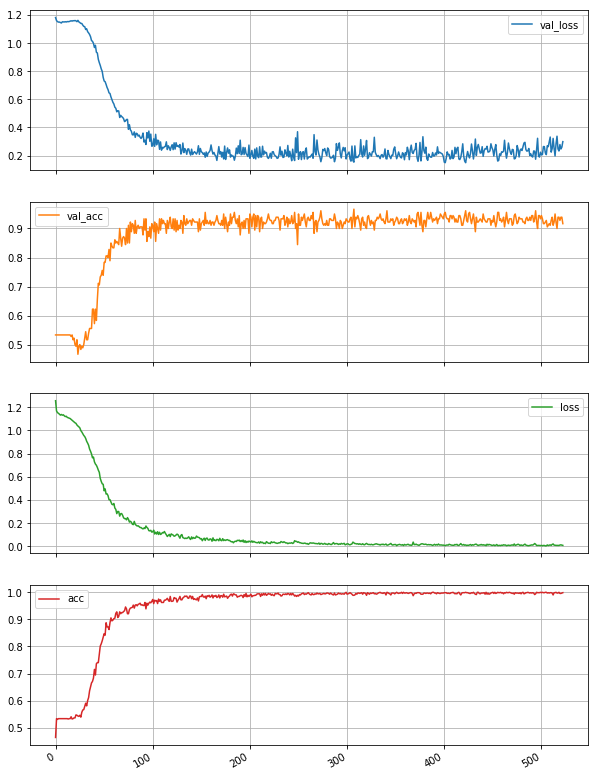

In [10]:
%matplotlib inline

# The history attribute from history object is a record of training loss values and metrics values at 
# successive epochs, as well as validation loss values and validation metrics values. It can be used to plot graphs
# which let us understand how good the training was performed over the epochs.

df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [11]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [12]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "amlangup")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50288686")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 1  Correct :99
Testing Accuracy: 99.0
